<a href="https://colab.research.google.com/github/DRRguez/DRRguez/blob/main/TI_1_Practica2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2

**Nombre:** Diego Alfredo Rodríguez Rodríguez 
**e-mail:** diego.rodriguez1787@alumnos.udg.mx


## MODULES

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go


from scipy.stats import wrapcauchy
from scipy.stats import levy_stable

## CLASSES

In [2]:
################# http://www.pygame.org/wiki/2DVectorClass ##################
class Vec2d(object):
    """2d vector class, supports vector and scalar operators,
       and also provides a bunch of high level functions
       """
    __slots__ = ['x', 'y']

    def __init__(self, x_or_pair, y = None):
        if y == None:            
            self.x = x_or_pair[0]
            self.y = x_or_pair[1]
        else:
            self.x = x_or_pair
            self.y = y
            
    # Addition
    def __add__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x + other.x, self.y + other.y)
        elif hasattr(other, "__getitem__"):
            return Vec2d(self.x + other[0], self.y + other[1])
        else:
            return Vec2d(self.x + other, self.y + other)

    # Subtraction
    def __sub__(self, other):
        if isinstance(other, Vec2d):
            return Vec2d(self.x - other.x, self.y - other.y)
        elif (hasattr(other, "__getitem__")):
            return Vec2d(self.x - other[0], self.y - other[1])
        else:
            return Vec2d(self.x - other, self.y - other)
    
    # Vector length
    def get_length(self):
        return math.sqrt(self.x**2 + self.y**2)
    
    # rotate vector
    def rotated(self, angle):        
        cos = math.cos(angle)
        sin = math.sin(angle)
        x = self.x*cos - self.y*sin
        y = self.x*sin + self.y*cos
        return Vec2d(x, y)

######################################################
    #We create a new function to change lenght
    def changelength(self,new_l):
        x = self.x*new_l/self.get_length()
        y = self.y*new_l/self.get_length()
        return Vec2d(x, y)


## Actividad 1: Lévy distribution - N Curves

* Generar al menos las 4 curvas de distribución timpo Lévy stable que se observan en la imagen
* Visualizar con **plotly**

* Parametros m = 3.0, Levy_exponent = x, beta = 0


In [3]:
# init parameters
std_motion_steps = 3.0
number_Levy_flights = 4
beta = 0
resolution = 400

# Generate Auxiliar Domain
aux_domain = np.linspace(std_motion_steps-5, std_motion_steps+5, resolution)
#Generate Levy Flight exponents
Levy_exponent=np.linspace(5,19,number_Levy_flights)
Levy_exponent=Levy_exponent/10
#Generate Levy Flight Empty Matrix
Levy_pdf=np.zeros(shape=(resolution,number_Levy_flights))
# Generate Levy Probability Distribution Functions
for j in range(number_Levy_flights):
  Levy_pdf[:,j] = np.array([levy_stable.pdf(i,alpha=Levy_exponent[j],beta=beta,loc=std_motion_steps) for i in aux_domain])

In [4]:
# Initialize figure
fig_Levy_pdf = go.Figure()
# Graph
for i in range(number_Levy_flights):
  fig_Levy_pdf.add_trace(go.Scatter(x = aux_domain,
                                        y = Levy_pdf[:,i],
                                        marker = dict(size=2),
                                        mode = 'lines',
                                        name = 'Levy '+str(round(Levy_exponent[i],2))+', beta '+str(beta),
                                        showlegend = True
                                        ))
fig_Levy_pdf.show()

## Actividad 2: Lévy distribution - Histogram + Curve

* A partir de un conjunto de valores aleatorios extraidos de una distribución tipo Lévy stable, obtener su histograma y comparar con la curva correspondiente PDF
* Visualizar con **matplotlib**

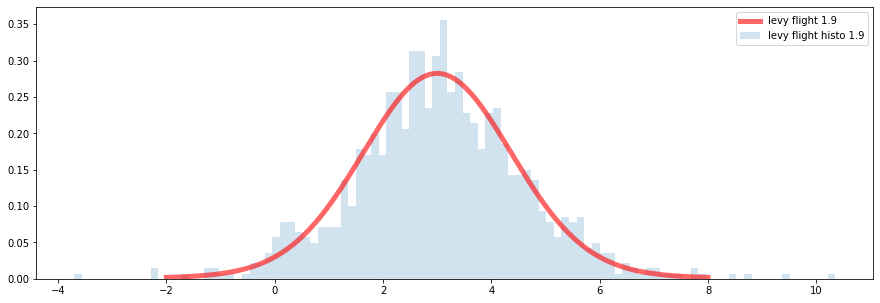

In [5]:
# init parameters
std_motion_steps = 3.0
Levy_exponent = 1.9
beta = 0
resolution = 1000

# Generate Auxiliar Domain
aux_domain = np.linspace(std_motion_steps-5, std_motion_steps+5, resolution)

#Generate Levy Flight PDF
Levy_pdf = np.array([levy_stable.pdf(i,alpha=Levy_exponent,beta=beta,loc=std_motion_steps) for i in aux_domain])

r = levy_stable.rvs(alpha=Levy_exponent, loc=std_motion_steps, size=resolution, beta=beta)

fig, ax = plt.subplots(1,1)
fig.set_figheight(5)
fig.set_figwidth(15)

ax.hist(r, bins=100, density=True, histtype='stepfilled', alpha=0.2, label='levy flight histo '+str(Levy_exponent))
ax.plot(aux_domain,Levy_pdf, 'r-', lw=5, alpha=0.6, label='levy flight '+str(Levy_exponent))
ax.legend(loc='best')
plt.show()

## Actividad 3: Lévy ﬂight - Vec2d - 1 Trajectory

* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**

In [6]:
# initialize cauchy distribution
CRW_exponent = 0.7

# resolution
resolution = 360
aux_domain = np.linspace(0, 2*np.pi, resolution)

# cauchy probability distribution function
wrapcauchy_pdf = np.array([wrapcauchy.pdf(i, CRW_exponent) for i in aux_domain])

# cauchy function normalization
wrapcauchy_pdf = wrapcauchy_pdf/np.sum(wrapcauchy_pdf)

In [7]:
# initialize Levy distribution
std_motion_steps = 3.0
Levy_exponent = 1.0
beta = 0
resolution = 1000 #A high resolution is needed for the .rvs method

# First We tried to use the same method as wrapcauchy but since the levy pdf has 
# open ends it is a mistake to enclose the results in a defined aux_domain that's
# why the .rvs method is better implemented in this situation
#####################
#aux_domain_levy = np.linspace(std_motion_steps-5, std_motion_steps+5, resolution)
#Levy_pdf = np.array([levy_stable.pdf(i,alpha=Levy_exponent,beta=beta,loc=std_motion_steps) for i in aux_domain_levy])
#Levy_pdf = Levy_pdf/np.sum(Levy_pdf)
#####################

#Levy Distribution
r = levy_stable.rvs(alpha=Levy_exponent, loc=std_motion_steps, size=resolution, beta=beta)

In [9]:
n_steps = 5000
s_pos = [0,0]

# Init velocity vector 
velocity = Vec2d(1, 0)

# Init dataframe 
L_flight = pd.DataFrame(columns=['x_pos','y_pos'])

# Concatenation auxilary
temp_df = pd.DataFrame([{'x_pos': s_pos[0], 'y_pos': s_pos[1]}])
# First Element Concatenation
L_flight = pd.concat([L_flight,temp_df], ignore_index=True)

# Steps Cycle
for i in range(n_steps-1):
  # Turn Angle Decision with Wrapcauchy
  turn_angle = np.random.choice(aux_domain,p=wrapcauchy_pdf)

  # Length Decision with Levy Flight
  # As mentioned before we opted to use the .rvs distribution instead of a 
  # limited aux_domain
  #new_length = np.random.choice(aux_domain_levy,p=Levy_pdf)
  new_length = abs(np.random.choice(r)) #The absolute value is used to avoid negatives.

  # Rotate Vector and Length Change
  velocity = velocity.rotated(turn_angle)
  velocity = velocity.changelength(new_length)
  # Dataframe concatenation
  temp_df = pd.DataFrame([{'x_pos':L_flight.x_pos[i]+velocity.x, 'y_pos':L_flight.y_pos[i]+velocity.y}])
  L_flight = pd.concat([L_flight,temp_df], ignore_index=True)

In [10]:
# Init figure
fig_LF= go.Figure()

fig_LF.add_trace(go.Scatter(x= L_flight['x_pos'].values,
                            y = L_flight['y_pos'].values,
                            marker = dict(size=2),
                            line = dict(width=2),
                            mode = 'lines',
                            name = ' Levy Flight, Cauchy '+str(CRW_exponent)+
                            ', Levy '+str(Levy_exponent),
                            showlegend = True
                            ))
fig_LF.show()

In [11]:
# time aux vector
times = np.linspace(0,1, n_steps)

#init figure
fig_BM_3d = go.Figure()

#plot trajectory
fig_BM_3d.add_trace(go.Scatter3d(x= L_flight['x_pos'].values,
                              y = L_flight['y_pos'].values,
                              z = times,
                              marker = dict(size=2),
                              line = dict(width=2),
                              mode = 'lines',
                              name = 'Levy Flight 3D',
                              showlegend = True
                               ))

# figure parameters -- update layout
fig_BM_3d.update_layout(title_text = 'Levy Flight in 3D',
                        autosize = False,
                        width = 800,
                        height = 800,
                        scene_camera = dict(
                            up=dict(x=0, y=1, z=0),
                            center = dict(x=0, y=0, z=0),
                            eye=dict(x=0,y=0,z=1)),
                        scene = dict(
                            xaxis=dict(title='x_pos (mm)'),
                            yaxis=dict(title='y_pos (mm)'),
                            zaxis=dict(title='time',nticks=20),
                        )
                        )

fig_BM_3d.show()

## Actividad 4: Correlated Random Walk - Vec2d - N Trajectories

* Generar tantas trayectorias tipo CRW como se especifique en una variable n_traj
* Cada una de las debe tener un coeficiente de Cauchy diferente
* Utilizar **Vec2d**
* Guardar trayectorias en **Pandas** Data Frame
* Visualizar proyección en 3d con **plotly**
* Exportar trayectorias como *pkl*

In [12]:
# initialize cauchy distribution
n_traj=6
resolution = 360

CRW_exponent = np.linspace(20,95,n_traj)/100
# resolution

r_cauchy = np.zeros(shape=(resolution,n_traj))

# cauchy probability distribution function
for i in range(n_traj):
  r_cauchy[:,i] = wrapcauchy.rvs(c=CRW_exponent[i], loc=0, size=resolution)

#aux_domain = np.linspace(0, 2*np.pi, resolution)

#wrapcauchy_pdf=np.zeros(shape=(resolution,n_traj))
# cauchy probability distribution function
#for j in range(n_traj):
  #wrapcauchy_pdf[:,j] = np.array([wrapcauchy.pdf(i, CRW_exponent[j]) for i in aux_domain])
  # cauchy function normalization
  #wrapcauchy_pdf[:,j] = wrapcauchy_pdf[:,j]/np.sum(wrapcauchy_pdf[:,j])


In [13]:
n_steps = 1000
s_pos = [0,0]
speed = 6

# Init velocity vector 
velocity = Vec2d(speed, 0)

# Init dataframe 
NCRW = pd.DataFrame(columns=['x0_pos','y0_pos'])
# A temporary column data frame is cycled to concatenate all columns for all the CRW
for i in range(n_traj-1):
  temp_column = pd.DataFrame(columns=['x'+str(i+1)+'_pos','y'+str(i+1)+'_pos'])
  NCRW=pd.concat([NCRW,temp_column],axis=1)

# Concatenation auxilary init
# A secondary data frame is cycled to create all the dictionaries for all the columns
temp_df = pd.DataFrame([{'x0_pos': s_pos[0], 'y0_pos': s_pos[1]}])
for i in range(n_traj-1):
  temp_df2 = pd.DataFrame([{'x'+str(i+1)+'_pos': s_pos[0], 'y'+str(i+1)+'_pos': s_pos[1]}])
  temp_df=pd.concat([temp_df,temp_df2],axis=1,join='inner')

# First Element Concatenation
NCRW = pd.concat([NCRW,temp_df],ignore_index=True)

# Steps Cycle
for i in range(n_steps-1):
  for j in range(n_traj):
    # Turn Angle Decision with Wrapcauchy for eachy wrap cauchy calculated
    turn_angle = np.random.choice(r_cauchy[:,j])
    velocity = velocity.rotated(turn_angle)

    # Auxilary data frame values refresh
    temp_df['x'+str(j)+'_pos'] = temp_df['x'+str(j)+'_pos'].replace([temp_df['x'+str(j)+'_pos']],NCRW['x'+str(j)+'_pos'].values[i]+velocity.x)
    temp_df['y'+str(j)+'_pos'] = temp_df['y'+str(j)+'_pos'].replace([temp_df['y'+str(j)+'_pos']],NCRW['y'+str(j)+'_pos'].values[i]+velocity.y)
 
  # Outside the n_traj cycle we concatenate the temp_df to our NCRW dataframe
  NCRW = pd.concat([NCRW,temp_df], ignore_index=True)

In [14]:
# Init figure
fig_NCRW= go.Figure()
for i in range(n_traj):
  fig_NCRW.add_trace(go.Scatter(x= NCRW['x'+str(i)+'_pos'].values,
                              y = NCRW['y'+str(i)+'_pos'].values,
                              marker = dict(size=2),
                              line = dict(width=2),
                              mode = 'lines',
                              name = ' CRW, Cauchy '+str(CRW_exponent[i]),
                              showlegend = True
                              ))
fig_NCRW.show()

In [15]:
# time aux vector
times = np.linspace(0,1, n_steps)

#init figure
fig_NCRW_3d = go.Figure()

#plot trajectory
for i in range(n_traj):
  fig_NCRW_3d.add_trace(go.Scatter3d(x= NCRW['x'+str(i)+'_pos'].values,
                                y = NCRW['y'+str(i)+'_pos'].values,
                                z = times,
                                marker = dict(size=2),
                                line = dict(width=2),
                                mode = 'lines',
                                name = ' CRW, Cauchy '+str(CRW_exponent[i]),
                                showlegend = True
                                ))


# figure parameters -- update layout
fig_NCRW_3d.update_layout(title_text = 'N Correlated Random Walks',
                        autosize = False,
                        width = 800,
                        height = 800,
                        scene_camera = dict(
                            up=dict(x=0, y=1, z=0),
                            center = dict(x=0, y=0, z=0),
                            eye=dict(x=0,y=0,z=1)),
                        scene = dict(
                            xaxis=dict(title='x_pos (mm)'),
                            yaxis=dict(title='y_pos (mm)'),
                            zaxis=dict(title='time',nticks=20),
                        )
                        )

fig_NCRW_3d.show()